<a href="https://colab.research.google.com/github/GabriellFelipe07/Prediction_AirlinesData/blob/main/Airlines_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airlines Data**



Gabriel Felipe Machado de Oliveira, 2022

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Introdução: apresentação dos dados
Os dataset utilizado traz informações sobre características e atrasos - ou não - de linhas aéreas. O objetivo principal do estudo, é a previsão de atrasos baseados nos comportamentos dos departamentos responsáveis pelas viagens.
Abaixo, a especificação das váriaveis:
- id: ID de cada observação;
- Airline: Tipo da linha comercial aérea;
- Flight: Modelo da aeronave;
- AirportFrom: Localização do aeroporto de saída do voo;
- ArportTo: Localização do aeropotro de destino do voo;
- DayOfWeek: Dia da semana, sendo 1 = segunda-feira;
- Time: Horário do voo;
- Lenght: Duração da viagem;
- Delay: Se o voo atrasou ou não (1 = Sim, 0 = não).


In [ ]:
data = pd.read_csv('Airlines.csv')
data.shape

(539383, 9)

Observe que trata-se de 8 variáveis preditoras, 1 variável resposta e 539383 instâncias ou observações.

# 2. Limpeza e Tratamento dos dados

Visualizando os dados:

In [ ]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


Obtendo as informações do dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


Verificando a existência de valores NaN no conjunto.



In [ ]:
data.isna()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
539378,False,False,False,False,False,False,False,False,False
539379,False,False,False,False,False,False,False,False,False
539380,False,False,False,False,False,False,False,False,False
539381,False,False,False,False,False,False,False,False,False


Perceba que há variáveis categóricas e nosso objetivo é ter apenas inteiras para a classificação. Observemos quais são as que devem ser tratadas: 

In [ ]:
data.select_dtypes(include = 'object').columns

Index(['Airline', 'AirportFrom', 'AirportTo'], dtype='object')

Temos duas opções: excluir elas do dataset ou rotularmos elas com valores numéricos. Nesse caso, será utilizado a técnica LabelEncoding para codificar as variáveis ao invés de simplesmente excluirmos.

In [ ]:
from sklearn import preprocessing

### **2.1. Variável "Airline"**

In [ ]:
data['Airline'].value_counts()

WN    94097
DL    60940
OO    50254
AA    45656
MQ    36605
US    34500
XE    31126
EV    27983
UA    27619
CO    21118
FL    20827
9E    20686
B6    18112
YV    13725
OH    12630
AS    11471
F9     6456
HA     5578
Name: Airline, dtype: int64

In [ ]:
label_encoder1 = preprocessing.LabelEncoder()
data['Airline'] = label_encoder1.fit_transform(data['Airline'])

data['Airline'].value_counts()                                               

15    94097
5     60940
12    50254
1     45656
10    36605
14    34500
16    31126
6     27983
13    27619
4     21118
8     20827
0     20686
3     18112
17    13725
11    12630
2     11471
7      6456
9      5578
Name: Airline, dtype: int64

### **2.2. Variável AirportFrom** 

In [ ]:
data['AirportFrom'].value_counts()

ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [ ]:
label_encoder2 = preprocessing.LabelEncoder()
data['AirportFrom'] = label_encoder2.fit_transform(data['AirportFrom'])

data['AirportFrom'].value_counts()

16     34449
208    24822
80     22154
79     19843
154    16657
       ...  
189       16
259       15
125       10
8          9
3          2
Name: AirportFrom, Length: 293, dtype: int64

### **2.3. Variável AirportTo** 

In [ ]:
data['AirportTo'].value_counts()

ATL    34440
ORD    24871
DFW    22153
DEN    19848
LAX    16656
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [ ]:
label_encoder3 = preprocessing.LabelEncoder()
data['AirportTo'] = label_encoder3.fit_transform(data['AirportTo'])

data['AirportTo'].value_counts()

16     34440
208    24871
80     22153
79     19848
154    16656
       ...  
189       16
259       15
125       10
8          9
3          2
Name: AirportTo, Length: 293, dtype: int64

### **2.4. Variável ID**
Perceba que embora a variável ID não seja categórica ela basicamente numera as intâncias, assim, podemos excluí-la do conjunto.

In [ ]:
data = data.drop(columns=['id'])

### **2.4. Considerações e observações sobre os tratamentos**

Observemos como ficou o nosso conjunto:

In [ ]:
data.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,4,269,253,135,3,15,205,1
1,14,1558,217,60,3,15,222,1
2,1,2400,154,80,3,20,165,1
3,1,2466,253,80,3,20,195,1
4,2,108,14,252,3,30,202,0


Perceba que agora possuimos apenas variávels numéricas.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Airline      539383 non-null  int64
 1   Flight       539383 non-null  int64
 2   AirportFrom  539383 non-null  int64
 3   AirportTo    539383 non-null  int64
 4   DayOfWeek    539383 non-null  int64
 5   Time         539383 non-null  int64
 6   Length       539383 non-null  int64
 7   Delay        539383 non-null  int64
dtypes: int64(8)
memory usage: 37.0 MB


# 3. Análise Exploratória

Antes de irmos para as predições, devemos analisar nosso conjunto, isto é: analisar todas as variáveis individualmente, observar suas correlações e aplicar técnicas estatísticas que, eventualmente, serão necessárias para termos uma predição mais precisa.

In [ ]:
data.describe()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,9.334527,2427.928630,144.116322,144.143162,3.929668,802.728963,132.202007,0.445442
std,5.306368,2067.429837,79.379776,79.353137,1.914664,278.045911,70.117016,0.497015
min,0.000000,1.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,5.000000,712.000000,79.000000,79.000000,2.000000,565.000000,81.000000,0.000000
50%,10.000000,1809.000000,153.000000,153.000000,4.000000,795.000000,115.000000,0.000000
75%,15.000000,3745.000000,208.000000,208.000000,5.000000,1035.000000,162.000000,1.000000
max,17.000000,7814.000000,292.000000,292.000000,7.000000,1439.000000,655.000000,1.000000


### **3.1. Histogramas de Frequências**

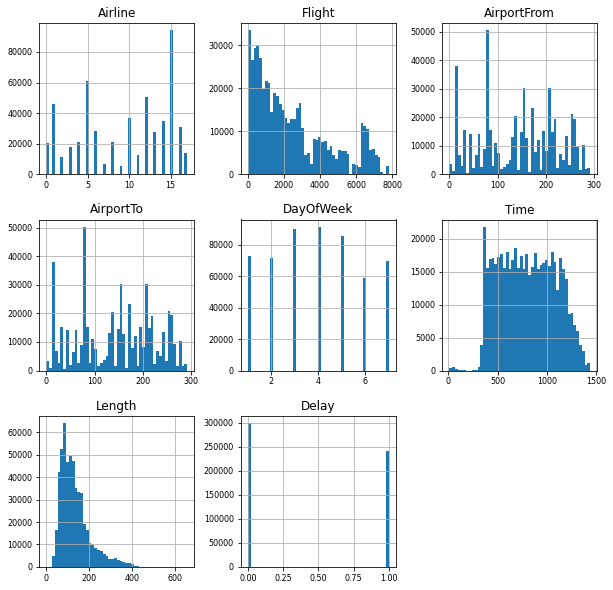

In [ ]:
data.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

Dificilmente consiguimos definir alguma distribuição das nossas features, a única que podemos criar uma hipótese confiável é a variável 'Length', poderíamos modelá-la com sendo uma Normal com assimetria à direita.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


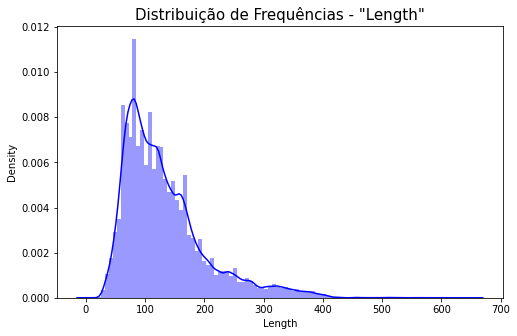

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Length'], color = 'blue', bins = 100)
plt.title('Distribuição de Frequências - "Length"', fontsize = 15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


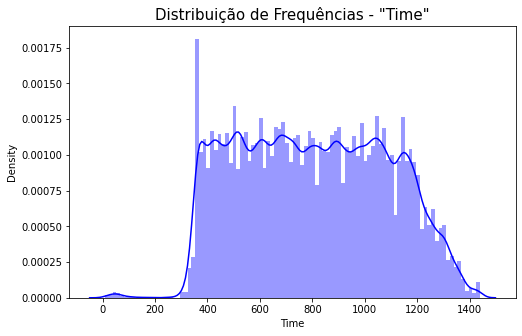

In [ ]:
plt.figure(figsize=(8, 5))
sns.distplot(data['Time'], color = 'blue', bins = 100)
plt.title('Distribuição de Frequências - "Time"', fontsize = 15)
plt.show()

Fazer a distribuição para as outras features não faz tanto sentido. Embora sejam numéricas estão mascaradas/codificadas.

### **3.2. Correlações**

Agora, focaremos nas correlações entre as features. Abaixo uma tabela de correlações:

In [ ]:
data.corr()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
Airline,1.000000,0.095285,0.098237,0.098791,-0.007258,0.004381,-0.207061,0.066936
Flight,0.095285,1.000000,-0.021802,-0.022072,0.000416,-0.005750,-0.341481,-0.046175
AirportFrom,0.098237,-0.021802,1.000000,0.015139,0.003732,-0.031555,0.049698,0.018459
AirportTo,0.098791,-0.022072,0.015139,1.000000,0.003846,0.030599,0.086982,0.047990
DayOfWeek,-0.007258,0.000416,0.003732,0.003846,1.000000,0.001273,0.013397,-0.026199
Time,0.004381,-0.005750,-0.031555,0.030599,0.001273,1.000000,-0.020612,0.150454
Length,-0.207061,-0.341481,0.049698,0.086982,0.013397,-0.020612,1.000000,0.040489
Delay,0.066936,-0.046175,0.018459,0.047990,-0.026199,0.150454,0.040489,1.000000


Graficamente, podemos gerar uma mapa de calor:

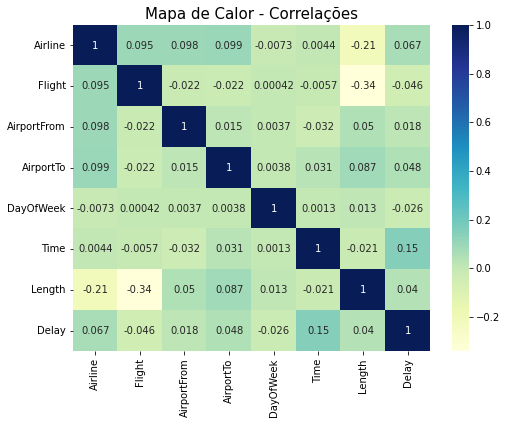

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(data.corr(),annot = True, cmap = "YlGnBu")
plt.title('Mapa de Calor - Correlações', fontsize = 15)
plt.show()

Não há altas correlações entre as variáveis, caso contrário terímos que ajustar o dataset: correlações altas entre as variáveis preditores podem afetar negativamente a predição da variável resposta.

# 4. Pré-Processamento
O último passo antes de testarmos os modelo e predizermos é o pré-processamento. A codificação das variáveis categóricas poderia entrar nesse tópico, entretanto, já foi feito no tratamento inicial. Aqui, trataremos de métodos para normalizar ou padronizar os nossos dados.

### **4.1. Dividindo o Dataset entre Teste e Treino**

In [ ]:
X = data.drop(columns = ['Delay'])
y = data['Delay']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

## **4.2. Normalização**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaleX = StandardScaler()

In [ ]:
X_train = scaleX.fit_transform(X_train)
X_test = scaleX.fit_transform(X_test)

Verificando a normalização:

In [ ]:
display(X_test)

array([[ 0.87970733, -0.71339146,  0.90930336, ...,  1.60320734,
         0.06567084, -0.31503246],
       [ 1.06807785, -0.23201104, -0.50192424, ...,  0.55792111,
        -1.46388357, -1.02827211],
       [-1.5691094 , -0.83953633,  0.49349523, ...,  1.08056423,
        -0.31221907,  0.75482701],
       ...,
       [-0.25051577, -1.06959364,  1.22430952, ...,  1.60320734,
         1.05178358,  0.69776784],
       [-0.81562733, -0.38860467, -1.61074592, ..., -1.01000822,
        -0.87005656, -0.55753394],
       [ 0.87970733, -0.1387315 ,  0.19108932, ...,  0.55792111,
         1.43327244, -0.81430021]])

Perceba que há alguns valores que superam 1, entretanto, grande parte do nosso conjunto varia entre -1 e 1 excluindo o peso de possíveis outliers e outras implicações de escalas distintas.

## 5. Modelos de Predição
Enfim, testaremos os principais modelos de classificação.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
mse_list = []
accuracy_list = []

### **5.1. Logistic Regression**

In [ ]:
logistic_regression = LogisticRegression() #iniciando o construtor
logistic_regression.fit(X_train, y_train) #Treinando com o conjunto de treino
y_pred = logistic_regression.predict(X_test) #Predizendo os valores

accuracyLR = round(accuracy_score(y_test, y_pred), 4)
mseLR = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyLR)
mse_list.append(mseLR)

print('Accuracy: ', accuracyLR)
print('MSE:', mseLR)

Accuracy:  0.5834
MSE: 0.4166


### **5.2. XGBClassifier**

In [ ]:
xgbclassifier = XGBClassifier()
xgbclassifier.fit(X_train, y_train)
y_pred = xgbclassifier.predict(X_test)

accuracyXGB = round(accuracy_score(y_test, y_pred), 4)
mseXGB = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyXGB)
mse_list.append(mseXGB)

print('Accuracy: ', accuracyXGB)
print('MSE:', mseXGB)

Accuracy:  0.6477
MSE: 0.3523


### **5.3. KNeighborsClassifier**

In [ ]:
kclassifier = KNeighborsClassifier()
kclassifier.fit(X_train, y_train)
y_pred = kclassifier.predict(X_test)

accuracyknn = round(accuracy_score(y_test, y_pred), 4)
mseknn = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyknn)
mse_list.append(mseknn)

print('Accuracy: ', accuracyknn)
print('MSE:', mseknn)

Accuracy:  0.6155
MSE: 0.3845


### **5.4. RandomForestClassifier**

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

accuracyrandom = round(accuracy_score(y_test, y_pred), 4)
mserandom = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyrandom)
mse_list.append(mserandom)

print('Accuracy: ', accuracyrandom)
print('MSE:', mserandom)

Accuracy:  0.6202
MSE: 0.3798


### **5.5. GaussianNB**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

accuracygaussian = round(accuracy_score(y_test, y_pred), 4)
msegaussian = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracygaussian)
mse_list.append(msegaussian)

print('Accuracy: ', accuracygaussian)
print('MSE:', msegaussian)

Accuracy:  0.5872
MSE: 0.4128


### **5.6. SGDClassifier**

In [ ]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)

accuracySGD = round(accuracy_score(y_test, y_pred), 4)
mseSGD = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracySGD)
mse_list.append(mseSGD)

print('Accuracy: ', accuracySGD)
print('MSE:', mseSGD)

Accuracy:  0.5817
MSE: 0.4183


### **5.7. DecisionTreeClassifier**

In [ ]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)

accuracydectree = round(accuracy_score(y_test, y_pred), 4)
msedectree = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracydectree)
mse_list.append(msedectree)

print('Accuracy: ', accuracydectree)
print('MSE:', msedectree)

Accuracy:  0.6082
MSE: 0.3918


### **5.8. Adaboost**



In [ ]:
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

accuracyada = round(accuracy_score(y_test, y_pred), 4)
mseada = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyada)
mse_list.append(mseada)

print('Accuracy: ', accuracyada)
print('MSE:', mseada)

Accuracy:  0.6437
MSE: 0.3563


# 6. Sumarização dos Resultados e Conclusão
Vamos agora analisar as Acurácias e os valores dos Erros Quadráticos Médios. Para facilitar, criaremos um DataFrame com os resultados de cada modelo:

In [ ]:
classificadores = ['Logistic Regression', 'XGBClassifier', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SGDClassifier', 'DecisionTreeClassifier', 'AdaBoostClassifier']


dic = {'Models': classificadores, 'Accuracy': accuracy_list, 'MSE': mse_list}
sum = pd.DataFrame(dic)
sum

,Models,Accuracy,MSE
0,Logistic Regression,0.5834,0.4166
1,XGBClassifier,0.6477,0.3523
2,KNeighborsClassifier,0.6155,0.3845
3,RandomForestClassifier,0.6202,0.3798
4,GaussianNB,0.5872,0.4128
5,SGDClassifier,0.5817,0.4183
6,DecisionTreeClassifier,0.6082,0.3918
7,AdaBoostClassifier,0.6437,0.3563


Em ordem crescente de acurácia:

In [ ]:
sum.sort_values(by = 'Accuracy', ascending = False)

,Models,Accuracy,MSE
1,XGBClassifier,0.6477,0.3523
7,AdaBoostClassifier,0.6437,0.3563
3,RandomForestClassifier,0.6202,0.3798
2,KNeighborsClassifier,0.6155,0.3845
6,DecisionTreeClassifier,0.6082,0.3918
4,GaussianNB,0.5872,0.4128
0,Logistic Regression,0.5834,0.4166
5,SGDClassifier,0.5817,0.4183


Os três melhores modelos de classificação para a predição da variável "Delay" foram: (1) XGBoostClassifier; (2) AdaBoostClassifier; (3) RandomForestClassifier. Perceba que os que três melhores modelos, teoricamente, partem de um princípio do modelo de DecisionTree, entretanto, combinam várias Árvores de Decisão e encontram a melhor combinação para predição.

Assim, concluímos que o melhor modelo, no caso, é o XGBoost. Embora a acurácia (0.6477) e o MSE (0.3523) não sejam ótimos, atua positivamente na predição.